<a href="https://colab.research.google.com/github/6kavi/stock-forecasting-with-cnn/blob/main/bullrun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold

from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential,load_model
from keras.layers import Dense,Dropout,Reshape,Flatten,LeakyReLU,BatchNormalization,Conv1D
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.initializers import HeNormal
from keras.saving import register_keras_serializable
import keras

from keras.optimizers import Adam
from tensorflow.keras import backend as K
from keras.regularizers import l2,l1
import tensorflow as tf
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
paths = []
def print_file_paths(folder_path):

    for root, dirs, files in os.walk(folder_path):
        for file_name in files:

            file_path = os.path.join(root, file_name)
            paths.append(file_path)

folder_path = '/content/drive/MyDrive/NIFTY 50'
print_file_paths(folder_path)

In [ ]:
minmax = MinMaxScaler(feature_range=(0,1))




In [ ]:
train_x = []
train_y = []
s = 10



for x in paths:
    df = pd.read_csv(x)

    df.dropna(inplace=True)

    df.drop_duplicates(inplace=True)

    close_price = df['Close']


    #print(np.shape(close_price))





    close_price_2d = np.array(close_price).reshape(-1, 1)
    scaled_price = minmax.fit_transform(close_price_2d)
    #print(np.shape(scaled_price))



    for i in range(len(scaled_price)-s-10):

        train_x.append(scaled_price[i: s+i ])



        train_y.append(scaled_price[i + s:i + s + 10])








train_x = np.array(train_x)
train_y = np.array(train_y)


train_x = np.reshape(train_x, (train_x.shape[0], train_x.shape[1], 1))
train_y = np.reshape(train_y, (train_y.shape[0], train_y.shape[1], 1))

#print(np.shape(train_y))
#print(np.shape(train_x))

(5863,)
(5863, 1)
(5215,)
(5215, 1)
(5212,)
(5212, 1)
(5212,)
(5212, 1)
(5214,)
(5214, 1)
(5863,)
(5863, 1)
(3835,)
(3835, 1)
(5181,)
(5181, 1)
(5212,)
(5212, 1)
(5212,)
(5212, 1)
(5865,)
(5865, 1)
(3114,)
(3114, 1)
(5866,)
(5866, 1)
(1410,)
(1410, 1)
(3905,)
(3905, 1)
(5182,)
(5182, 1)
(5862,)
(5862, 1)
(5866,)
(5866, 1)
(5183,)
(5183, 1)
(5863,)
(5863, 1)
(3905,)
(3905, 1)
(5186,)
(5186, 1)
(3857,)
(3857, 1)
(5866,)
(5866, 1)
(5866,)
(5866, 1)
(5866,)
(5866, 1)
(5863,)
(5863, 1)
(5863,)
(5863, 1)
(1378,)
(1378, 1)
(5212,)
(5212, 1)
(5866,)
(5866, 1)
(5864,)
(5864, 1)
(5212,)
(5212, 1)
(3907,)
(3907, 1)
(5212,)
(5212, 1)
(5185,)
(5185, 1)
(5866,)
(5866, 1)
(5471,)
(5471, 1)
(5866,)
(5866, 1)
(3873,)
(3873, 1)
(4992,)
(4992, 1)
(5863,)
(5863, 1)
(4601,)
(4601, 1)
(5863,)
(5863, 1)
(4948,)
(4948, 1)
(5866,)
(5866, 1)
(5033,)
(5033, 1)
(237545, 10, 1)
(237545, 10, 1)


No null values found.
Number of null values in train_x: 0
Number of null values in train_y: 0


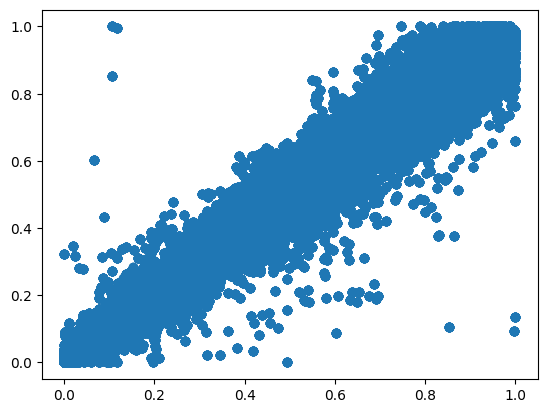

In [ ]:
if np.isnan(train_x).any() or np.isnan(train_y).any():
    print("Null values are present.")
else:
    print("No null values found.")

null_train_x = np.sum(np.isnan(train_x))
null_train_y = np.sum(np.isnan(train_y))

print("no.of null values in train_x:",null_train_x)
print("no.of null values in train_y:",null_train_y)
plt.scatter(train_x,train_y)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(train_x,train_y, test_size=0.2, random_state=42)
print('xtrain,ytrain:',x_train.shape,'xtest,ytest:',y_test.shape)

xtrain,ytrain: (190036, 10, 1) xtest,ytest: (47509, 10, 1)


In [ ]:

model = Sequential()


model.add(Conv1D(filters=32, kernel_size=1, activation=LeakyReLU(alpha=0.1),input_shape=(10, 1)))
model.add(BatchNormalization())
model.add(Conv1D(filters=64, kernel_size=1,activation=LeakyReLU(alpha=0.1)))
model.add(BatchNormalization())
model.add(Conv1D(filters=128, kernel_size=1,activation=LeakyReLU(alpha=0.1)))
model.add(BatchNormalization())
model.add(Conv1D(filters=256, kernel_size=1,activation=LeakyReLU(alpha=0.1)))
model.add(BatchNormalization())
model.add(Conv1D(filters=128, kernel_size=1,activation=LeakyReLU(alpha=0.1)))
model.add(BatchNormalization())
model.add(Conv1D(filters=64, kernel_size=1,activation=LeakyReLU(alpha=0.1)))
model.add(BatchNormalization())
model.add(Conv1D(filters=32, kernel_size=1,activation=LeakyReLU(alpha=0.1)))
model.add(BatchNormalization())
model.add(Conv1D(filters=1, kernel_size=1,activation=LeakyReLU(alpha=0.1)))
model.add(Dense(1, activation='tanh', kernel_regularizer=l2(0.1), kernel_initializer=HeNormal()))



model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 10, 32)            64        
                                                                 
 batch_normalization (Batch  (None, 10, 32)            128       
 Normalization)                                                  
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 64)            2112      
                                                                 
 batch_normalization_1 (Bat  (None, 10, 64)            256       
 chNormalization)                                                
                                                                 
 conv1d_2 (Conv1D)           (None, 10, 128)           8320      
                                                                 
 batch_normalization_2 (Bat  (None, 10, 128)           5

In [ ]:
checkpoint_filepath = '/content/drive/MyDrive/bullrunstart_checkpointA7z0.h5'

checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True

)

try:
    model = load_model('/content/drive/MyDrive/bullrunstart_modelA7z0.h5')
    model.load_weights(checkpoint_filepath)
except Exception as e:
    print("Error loading model:", e)
    exit()
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
loss_function = keras.losses.MeanAbsoluteError()
model.compile(optimizer=Adam(0.00001), loss=loss_function,metrics=['mse'])


In [ ]:
history=model.fit(x_train,y_train, batch_size=180, epochs=100,validation_data=(x_test, y_test),callbacks=[checkpoint_callback])
model.save("/content/drive/MyDrive/bullrunstart_modelA7z0.h5")
test_loss, test_mae = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test MAE:", test_mae)

plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.plot(history.history["mse"], label="mse")
plt.plot(history.history["val_mse"], label="val_mse")


plt.legend()
plt.show()


Epoch 1/100
1056/1056 [==============================] - 16s 15ms/step - loss: 0.0235 - mse: 9.9308e-04 - val_loss: 0.0240 - val_mse: 7.9971e-04
Epoch 2/100
1056/1056 [==============================] - 15s 14ms/step - loss: 0.0231 - mse: 9.5892e-04 - val_loss: 0.0284 - val_mse: 9.3662e-04
Epoch 3/100
1056/1056 [==============================] - 15s 14ms/step - loss: 0.0233 - mse: 9.8421e-04 - val_loss: 0.0273 - val_mse: 8.7682e-04
Epoch 4/100
1056/1056 [==============================] - 15s 14ms/step - loss: 0.0233 - mse: 9.8592e-04 - val_loss: 0.0280 - val_mse: 9.2067e-04
Epoch 5/100
1056/1056 [==============================] - 15s 14ms/step - loss: 0.0233 - mse: 9.9255e-04 - val_loss: 0.0302 - val_mse: 0.0010
Epoch 6/100
1056/1056 [==============================] - 15s 14ms/step - loss: 0.0232 - mse: 9.8058e-04 - val_loss: 0.0287 - val_mse: 9.5011e-04
Epoch 7/100
1056/1056 [==============================] - 14s 14ms/step - loss: 0.0232 - mse: 9.8374e-04 - val_loss: 0.0257 - val_mse: 

(1, 10)
1/1 [==============================] - 1s 630ms/step
predicted: [[0.7514275 ]
 [0.73139584]
 [0.73433244]
 [0.73284763]
 [0.75133467]
 [0.7489563 ]
 [0.74683887]
 [0.7561702 ]
 [0.75482255]
 [0.74676   ]] actual: [[0.74939122]
 [0.73645065]
 [0.72666877]
 [0.72157406]
 [0.73217108]
 [0.74684387]
 [0.74974783]
 [0.74658913]
 [0.74465312]
 [0.74022075]]


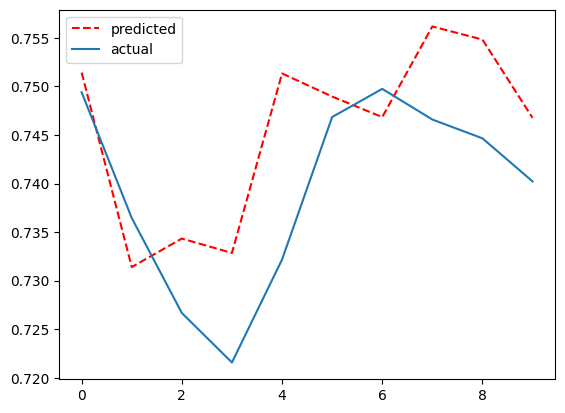

In [ ]:

reshaped_data = train_x[5000].reshape(1, -1)
print(reshaped_data.shape)
p = model.predict(reshaped_data)
pt = minmax.inverse_transform(p.reshape((10,1)))
a = minmax.inverse_transform(train_y[5000])

print('predicted:',pt,'actual:',a)
plt.plot(pt,color='red',ls='--')

plt.plot(a)
plt.legend(['predicted','actual'])
plt.show()